In [79]:
from json.tool import main
from mimetypes import init
import math
import numpy as np
import scipy.spatial
from collections import Counter
from collections import OrderedDict
import pandas as pd #for data franes 
import matplotlib.pyplot as plt # for data visualization 
import seaborn as sns # for data visualization
import warnings
warnings.filterwarnings('ignore')
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [30]:
k = 1

In [31]:
def dataframe(data, labels):
        return pd.read_csv(data, names = labels)

In [32]:
def shuff(data):
        return shuffle(data)

In [33]:
def ttsplit(data):
        X, y = train_test_split(data, test_size=0.2)
        return X,y

In [91]:
def minmaxscaling(column) :
    return ((column - column.min()) / (column.max() - column.min()))

def normalize(df):
    for col in df.columns[0:4]:
        df[col] = minmaxscaling(df[col])
    return df

In [63]:
def sort_tuple(tup): 
    # reverse = None (Sorts in Ascending order) 
    # key is set to sort using second element of 
    # sublist lambda has been used 
    tup.sort(key = lambda x: x[0]) 
    return tup 

# # Driver Code 
# tup = [('rishav', 10), ('akash', 5), ('ram', 20), ('gaurav', 15)] 
  
# # printing the sorted list of tuples
# print(Sort_Tuple(tup)) 

In [73]:
def knn(X, y, k):      
        d = []
        knn = []
        for test_index, test_row in y.iterrows():
            d = []
            point1 = np.array([test_row['f1'], test_row['f2'], test_row['f3'], test_row['f4']])
            for train_index, train_row in X.iterrows():
                dist = 0
                point2 = np.array([train_row['f1'], train_row['f2'], train_row['f3'], train_row['f4']])
                dist = scipy.spatial.distance.euclidean(point1, point2)
                d.append( (dist, [ train_row['f1'], train_row['f2'], train_row['f3'], train_row['f4'], train_row['label'] ]) ) 
            count=0
            knearest = []
            new_d = sort_tuple(d)
            for i in new_d:
                if(count<k):
                    knearest.append(i[1][4])
                    count+=1
                else:
                    break
            # print((knearest, test_row['label']))
            knn.append((knearest, test_row['label']))
        # print(knn)
        return knn

In [74]:
def accuracy(knn):
        count = 0 
        for tup in knn:
            l = tup[0]
            occurence_count = Counter(l)
            s = occurence_count.most_common(1)[0][0]
            if s == tup[1]:
                count+=1
        return count/len(knn)

In [98]:
k=1
data = 'iris.csv'
labels= ['f1', 'f2', 'f3', 'f4', 'label']
X, y = ttsplit(shuff(dataframe(data, labels)))
X = normalize(X)
y = normalize(y)
# print(type(X))
# print(type(X.columns[0:4]))
# print(X.columns[0:4])
# print(X.head)
# print(y.head)
list = knn(X, y, k)
acc = accuracy(list)
print(acc)



1.0


{1: [], 3: [], 5: [], 7: [], 9: [], 11: [], 13: [], 15: [], 17: [], 19: [], 21: [], 23: [], 25: [], 27: [], 29: [], 31: [], 33: [], 35: [], 37: [], 39: [], 41: [], 43: [], 45: [], 47: [], 49: []}
{1: [1.0], 3: [0.975], 5: [0.975], 7: [0.9666666666666667], 9: [0.975], 11: [0.9833333333333333], 13: [0.9833333333333333], 15: [0.9833333333333333], 17: [0.975], 19: [0.975], 21: [0.9666666666666667], 23: [0.9583333333333334], 25: [0.9666666666666667], 27: [0.9666666666666667], 29: [0.9583333333333334], 31: [0.9583333333333334], 33: [0.95], 35: [0.9583333333333334], 37: [0.9583333333333334], 39: [0.9333333333333333], 41: [0.9416666666666667], 43: [0.9416666666666667], 45: [0.9416666666666667], 47: [0.9416666666666667], 49: [0.9416666666666667]}


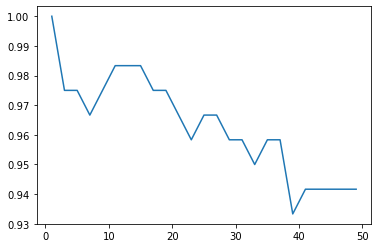

In [95]:
#change object oriented design and value for j
#shuffle before
#normalise values
#graph for training and testing
accd = {}
for i in range(1, 51, 2):
    accd.update( {i: []} )
print(accd)

#training accuracy for 1 to 51 values
for i in range(1, 2):
        data = 'iris.csv'
        labels= ['f1', 'f2', 'f3', 'f4', 'label']
        X, y = ttsplit(shuff(dataframe(data, labels)))
        for k in range(1, 51, 2):
            list = knn(X, X, k)
            acc = accuracy(list)
            accd[k].append(acc)
print(accd)

#finiding mean accuracies
time = []
mean_acc = []
c = 1

for i in accd:
    mean_acc.append(sum(accd[i])/len(accd[i]))
    time.append(c)
    c+=2
plt.plot(time, mean_acc)
plt.show()

{1: [], 3: [], 5: [], 7: [], 9: [], 11: [], 13: [], 15: [], 17: [], 19: [], 21: [], 23: [], 25: [], 27: [], 29: [], 31: [], 33: [], 35: [], 37: [], 39: [], 41: [], 43: [], 45: [], 47: [], 49: []}
{1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 3: [0.9583333333333334, 0.9583333333333334, 0.9666666666666667, 0.95, 0.9583333333333334, 0.9583333333333334, 0.9583333333333334, 0.975, 0.9666666666666667, 0.9583333333333334, 0.9666666666666667, 0.975, 0.9583333333333334, 0.9583333333333334, 0.975, 0.9583333333333334, 0.9666666666666667, 0.9833333333333333, 0.9666666666666667, 0.9666666666666667], 5: [0.9666666666666667, 0.975, 0.975, 0.9666666666666667, 0.9666666666666667, 0.975, 0.9583333333333334, 0.9833333333333333, 0.9833333333333333, 0.9666666666666667, 0.975, 0.9833333333333333, 0.9666666666666667, 0.975, 0.975, 0.9666666666666667, 0.975, 0.9916666666666667, 0.9666666666666667, 0.975], 7: [0.975, 0.9833333333333333, 0.983333333333

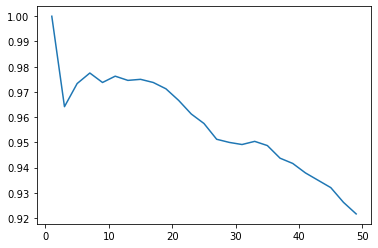

In [99]:
#change object oriented design and value for j
#shuffle before
#normalise values
#graph for training and testing
accd = {}
for i in range(1, 51, 2):
    accd.update( {i: []} )
print(accd)

#training accuracy for 1 to 51 values
for i in range(1, 21):
        data = 'iris.csv'
        labels= ['f1', 'f2', 'f3', 'f4', 'label']
        X, y = ttsplit(shuff(dataframe(data, labels)))
        for k in range(1, 51, 2):
            list = knn(X, X, k)
            acc = accuracy(list)
            accd[k].append(acc)
print(accd)

#finiding mean accuracies
time = []
mean_acc = []
c = 1

for i in accd:
    mean_acc.append(sum(accd[i])/len(accd[i]))
    time.append(c)
    c+=2
plt.plot(time, mean_acc)
plt.show()

{1: [], 3: [], 5: [], 7: [], 9: [], 11: [], 13: [], 15: [], 17: [], 19: [], 21: [], 23: [], 25: [], 27: [], 29: [], 31: [], 33: [], 35: [], 37: [], 39: [], 41: [], 43: [], 45: [], 47: [], 49: []}
{1: [1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667], 3: [1.0, 0.9, 1.0, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9333333333333333, 1.0, 0.9333333333333333, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667], 5: [1.0, 0.9333333333333333, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 1.0, 0.933333333333

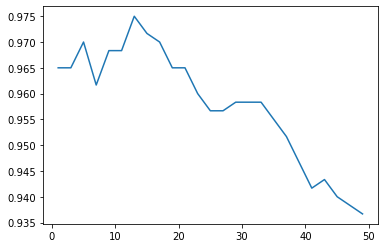

In [100]:
#change object oriented design and value for j
#shuffle before
#normalise values
#graph for training and testing
accd = {}
for i in range(1, 51, 2):
    accd.update( {i: []} )
print(accd)

#testing accuracy for 1 to 51 values
for i in range(1, 21):
        data = 'iris.csv'
        labels= ['f1', 'f2', 'f3', 'f4', 'label']
        X, y = ttsplit(shuff(dataframe(data, labels)))
        for k in range(1, 51, 2):
            list = knn(X, y, k)
            acc = accuracy(list)
            accd[k].append(acc)
print(accd)

#finiding mean accuracies
time = []
mean_acc = []
c = 1

for i in accd:
    mean_acc.append(sum(accd[i])/len(accd[i]))
    time.append(c)
    c+=2
plt.plot(time, mean_acc)
plt.show()